In [1]:
# -----------------------------
# Imports & Setup
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path
import sys

import warnings
warnings.filterwarnings('ignore')


project_root = Path.cwd().resolve().parent 
sys.path.append(str(project_root))

from src.data.loader import FraudDataLoader
from src.data.cleaner import TransactionDataCleaner
from src.utils.io_utils import save_dataframe

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 50)

logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger("EDA_Fraud")


In [2]:
# -----------------------------
# Load Raw Data
# -----------------------------
fraud_loader = FraudDataLoader("../data/raw/Fraud_Data.csv")

fraud_df = fraud_loader.load()

logger.info(f"Fraud data shape: {fraud_df.shape}")
logger.info(f"Fraud data columns: {fraud_df.columns}")



2025-12-21 11:27:43,940 [INFO] Fraud data shape: (151112, 11)
2025-12-21 11:27:43,940 [INFO] Fraud data columns: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


In [3]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [5]:
fraud_df.describe()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09,0.291336


In [6]:
# -----------------------------
# Initial Data Report
# -----------------------------

cleaner = TransactionDataCleaner(fraud_df)
cleaner.report()


2025-12-21 11:27:44,185 [INFO] Dataset shape: (151112, 11)
2025-12-21 11:27:44,187 [INFO] Column data types:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object
2025-12-21 11:27:44,339 [INFO] Number of duplicate rows: 0
2025-12-21 11:27:44,375 [INFO] Missing values per column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
2025-12-21 11:27:44,375 [INFO] Missing values (%) per column:
user_id           0.0
signup_time       0.0
purchase_time     0.0
purchase_value    0.0
device_id     

In [7]:
# -----------------------------
#  Data Cleaning
# -----------------------------

fraud_df_clean = cleaner.clean(missing_strategy="fill_median")  # or "drop" based on your justification
logger.info("Data cleaning completed.")

# Optional: report after cleaning
cleaner.report()


2025-12-21 11:27:44,555 [INFO] Removed 0 duplicate rows
2025-12-21 11:27:44,595 [INFO] No missing values detected
2025-12-21 11:27:44,598 [INFO] Data cleaning completed.
2025-12-21 11:27:44,598 [INFO] Dataset shape: (151112, 11)
2025-12-21 11:27:44,600 [INFO] Column data types:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object
2025-12-21 11:27:44,755 [INFO] Number of duplicate rows: 0
2025-12-21 11:27:44,793 [INFO] Missing values per column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: 

2025-12-21 11:27:44,986 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:27:45,059 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


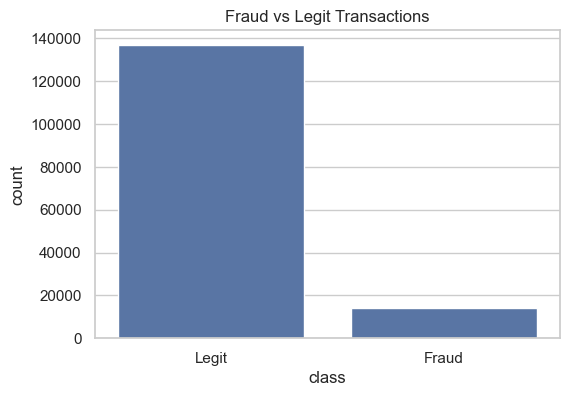

In [8]:
# -----------------------------
# Exploratory Data Analysis (EDA) - Univariate Analysis
# -----------------------------

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_df_clean)
plt.title("Fraud vs Legit Transactions")
plt.xticks([0,1], ["Legit", "Fraud"])
plt.show()


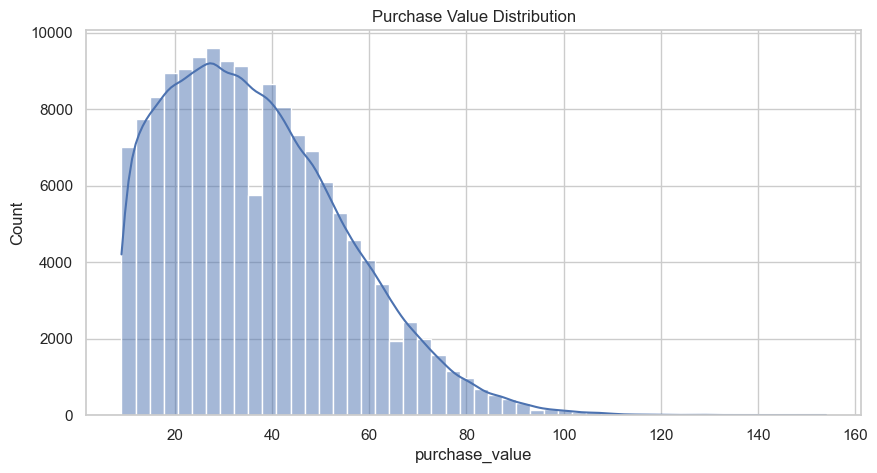

In [9]:
# Purchase value distribution
plt.figure(figsize=(10,5))
sns.histplot(fraud_df_clean['purchase_value'], bins=50, kde=True)
plt.title("Purchase Value Distribution")
plt.show()

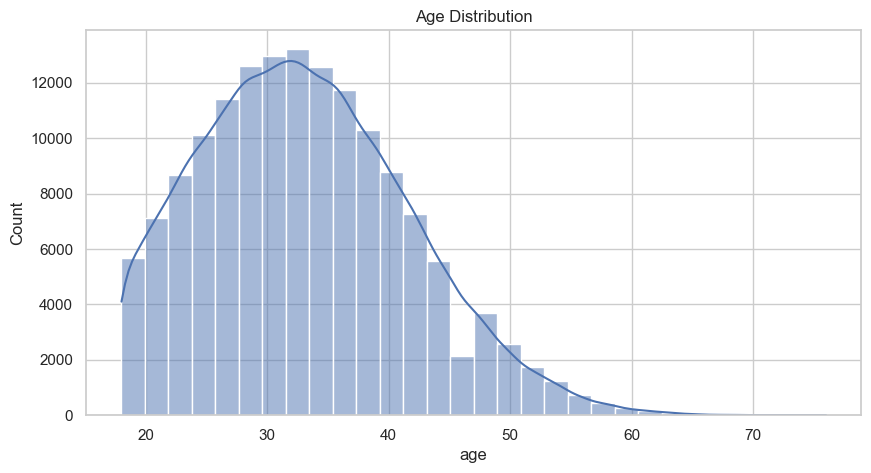

In [10]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(fraud_df_clean['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

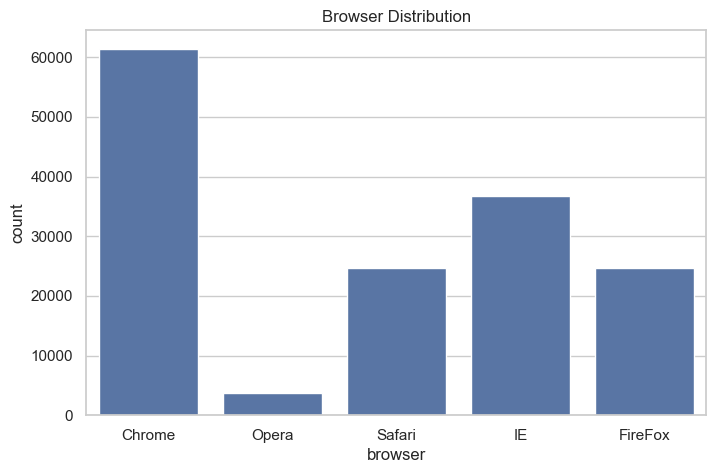

In [11]:
# Browser distribution
plt.figure(figsize=(8,5))
sns.countplot(x='browser', data=fraud_df_clean)
plt.title("Browser Distribution")
plt.show()

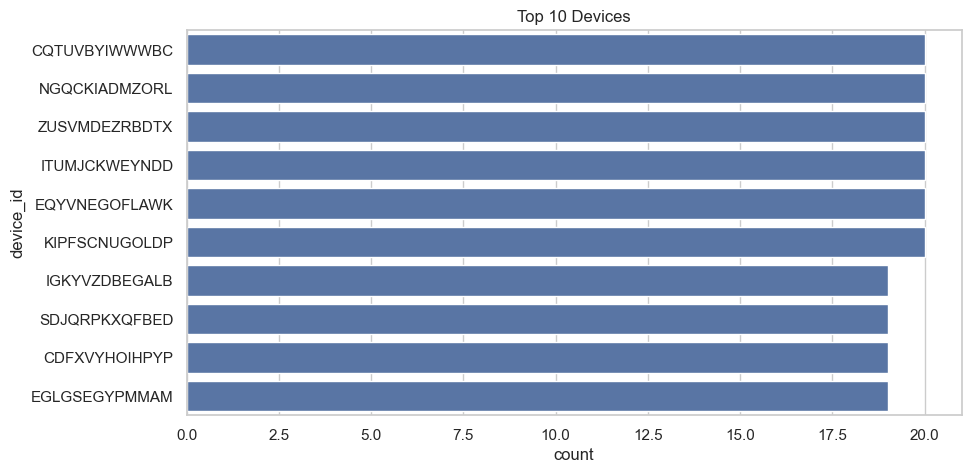

In [12]:
# Device distribution (top 10)
plt.figure(figsize=(10,5))
top_devices = fraud_df_clean['device_id'].value_counts().iloc[:10].index
sns.countplot(y='device_id', data=fraud_df_clean, order=top_devices)
plt.title("Top 10 Devices")
plt.show()


2025-12-21 11:27:51,635 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:27:51,749 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


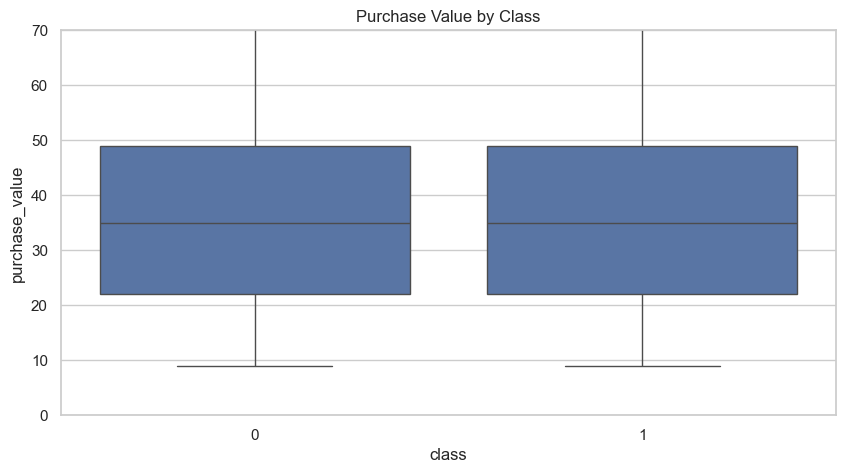

In [13]:
# -----------------------------
# Bivariate Analysis - Pre-Geolocation
# -----------------------------

# Purchase value vs class
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='purchase_value', data=fraud_df_clean)
plt.ylim(0, fraud_df_clean['purchase_value'].quantile(0.95))  # clip outliers
plt.title("Purchase Value by Class")
plt.show()

2025-12-21 11:27:52,347 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:27:52,435 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


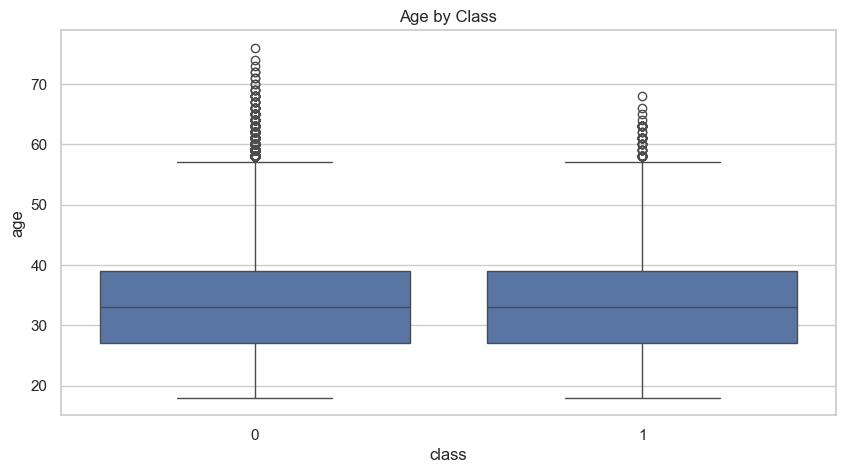

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='age', data=fraud_df_clean)
plt.title("Age by Class")
plt.show()

2025-12-21 11:27:52,873 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-21 11:27:53,026 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


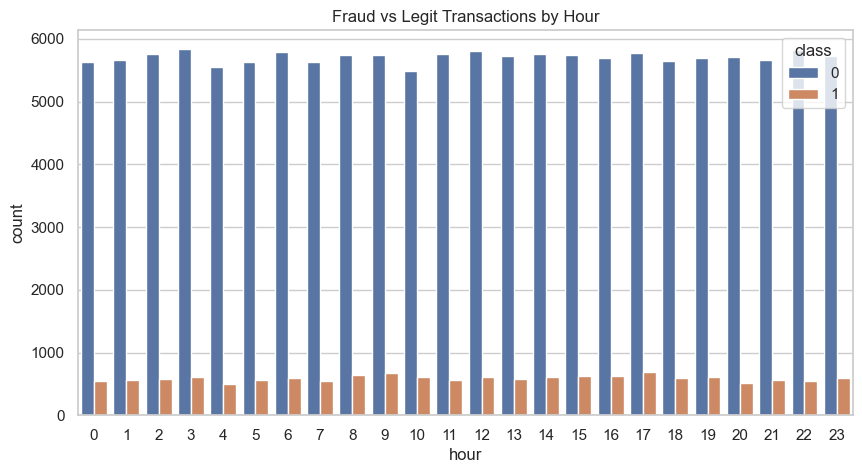

In [15]:
temp_df = fraud_df_clean.copy()
temp_df['hour'] = pd.to_datetime(temp_df['purchase_time']).dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(x='hour', hue='class', data=temp_df)
plt.title("Fraud vs Legit Transactions by Hour")
plt.show()


In [16]:
# -----------------------------
# Class Distribution Analysis
# -----------------------------
fraud_count = fraud_df_clean['class'].value_counts()
fraud_pct = fraud_df_clean['class'].value_counts(normalize=True) * 100

logger.info(f"Class distribution:\n{fraud_count}")
logger.info(f"Class percentage:\n{fraud_pct}")


2025-12-21 11:27:53,687 [INFO] Class distribution:
class
0    136961
1     14151
Name: count, dtype: int64
2025-12-21 11:27:53,691 [INFO] Class percentage:
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


In [17]:
# -----------------------------
# Save Cleaned Data
# -----------------------------
save_dataframe(fraud_df_clean, "../data/processed/fraud_data_cleaned.csv")
logger.info("Cleaned fraud data saved to processed folder.")


2025-12-21 11:27:55,448 [INFO] Cleaned fraud data saved to processed folder.


[IO] Data saved to ..\data\processed\fraud_data_cleaned.csv
